<a href="https://www.kaggle.com/code/ahmadsoliman94/titanic-survived-prediction?scriptVersionId=95579890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
os.chdir('/kaggle/input/titanic/')

In [3]:
!ls

gender_submission.csv  test.csv  train.csv


### Import Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
print(f'Train: {train.shape} \n Test: {test.shape} \n gender_submission: {gender_submission.shape}')

Train: (891, 12) 
 Test: (418, 11) 
 gender_submission: (418, 2)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data visualization

<AxesSubplot:>

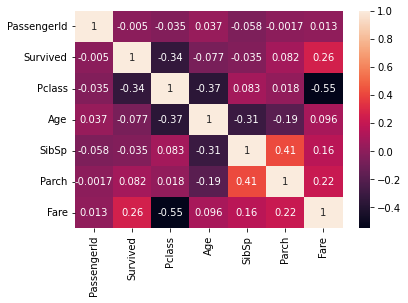

In [10]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

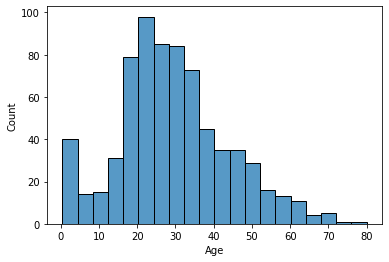

In [11]:
sns.histplot(x=train['Age'])

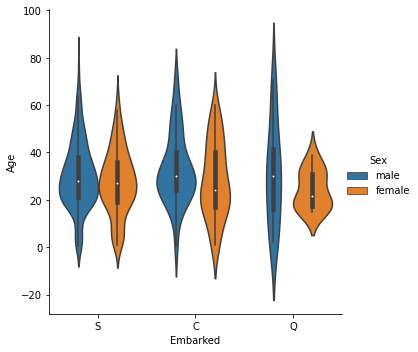

In [12]:
sns.catplot(x='Embarked',y='Age',hue='Sex',data=train,kind='violin')

### Embarked Disturbtion


In [13]:
Embarked = train['Embarked'].unique()
Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
count = train['Embarked'].value_counts()
count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

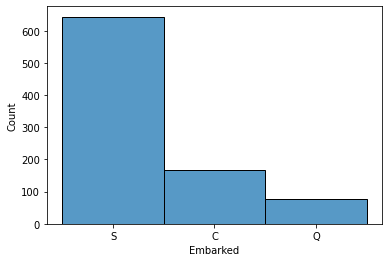

In [15]:
sns.histplot(x=train['Embarked'])

### Sex Disturbtion

In [16]:
sex = train['Sex'].unique()
sex

array(['male', 'female'], dtype=object)

In [17]:
sex_count = train['Sex'].value_counts()
sex_count

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Count'>

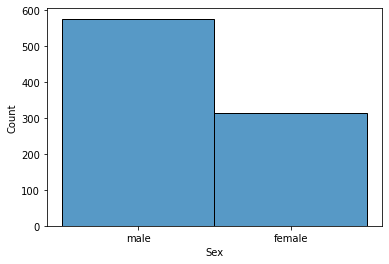

In [18]:
sns.histplot(x=train['Sex'])

# Preprocessing Data

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Check for Missing Data

In [21]:
print(train.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [22]:
print(test.isnull().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


### Handle missing values

In [23]:
# Train
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna('Q', inplace=True)
train.drop('Cabin', axis=1, inplace= True)



# Test
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test.drop('Cabin', axis=1, inplace= True)

In [24]:
print(train.isnull().sum().sort_values(ascending=False))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [25]:
print(test.isnull().sum().sort_values(ascending=False))

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### Handle object Datatype

In [28]:
gender_train =pd.get_dummies(train["Sex"])


In [29]:
gender_test = pd.get_dummies(test["Sex"])

### Merging dummies with dataframe

In [30]:
train = pd.concat([train.drop("Sex", axis = 1),gender_train], axis =1)

In [31]:
test = pd.concat([test.drop("Sex", axis = 1),gender_test], axis =1)

In [32]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1


In [33]:
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,S,0,1


### remove unnecessary columns 

In [34]:
# Train
train.drop('Name', axis=1, inplace= True)
train.drop('Ticket', axis=1, inplace= True)
train.drop('PassengerId', axis=1, inplace= True)

# Test
test.drop('Name', axis=1, inplace= True)
test.drop('Ticket', axis=1, inplace= True)
test.drop('PassengerId', axis=1, inplace= True)

### handle Embarked

In [35]:
embarked_train = pd.get_dummies(train["Embarked"])
embarked_test = pd.get_dummies(test["Embarked"])

In [36]:
train = pd.concat([train.drop("Embarked", axis = 1),embarked_train], axis =1)
test = pd.concat([test.drop("Embarked", axis = 1),embarked_test], axis =1)

In [37]:
# rename Columns
train.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True)
test.rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   female       891 non-null    uint8  
 7   male         891 non-null    uint8  
 8   Cherbourg    891 non-null    uint8  
 9   Queenstown   891 non-null    uint8  
 10  Southampton  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   female       418 non-null    uint8  
 6   male         418 non-null    uint8  
 7   Cherbourg    418 non-null    uint8  
 8   Queenstown   418 non-null    uint8  
 9   Southampton  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


### Splitting Data

In [40]:
X = train.drop('Survived',axis=1).values
y = train['Survived'].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (891, 10) 
 y_shape: (891,)


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.30, random_state=101,shuffle=True)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (623, 10) & X_test: (268, 10)
 y_train: (623,) & y_test: (268,)


### Scaling the Data

In [42]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Build a Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_test)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

Accuracy score of Test:  75.3731343283582
Accuracy score of Train:  98.3948635634029


### Cross Validation

In [45]:
# Grid Search CV :Getting Best Hyper Parameters
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [46]:
from sklearn.model_selection import GridSearchCV
parameters= {'criterion':['gini', 'entropy'],
             'max_depth':[3,4,5,6,7,8,9,10],'splitter':['best', 'random'],
            'random_state': [0,42]}

grid_search = GridSearchCV(estimator = clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 

grid_search = grid_search.fit(X_train_scaled, y_train)
print("best accuracy is :" , grid_search.best_score_ * 100)
grid_search.best_params_ 

best accuracy is : 83.45878136200717


{'criterion': 'gini', 'max_depth': 4, 'random_state': 42, 'splitter': 'random'}

In [47]:
clf = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4,random_state=42)
clf.fit(X_train_scaled, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = clf, X = X_train_scaled, y = y_train, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred = clf.predict(X_test_scaled)
dt_score = accuracy_score(y_test, y_pred)*100
print('Accuracy score: ', dt_score)

Validation score: 83.45878% (4.90827%)
Accuracy score:  80.97014925373134


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[149   5]
 [ 46  68]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


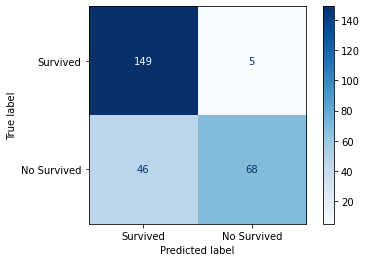

In [49]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(clf, X_test_scaled, y_test,
                              display_labels=['Survived','No Survived'],
                              cmap=plt.cm.Blues)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       154
           1       0.93      0.60      0.73       114

    accuracy                           0.81       268
   macro avg       0.85      0.78      0.79       268
weighted avg       0.84      0.81      0.80       268



### Build a K-Neighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [52]:
parameters= {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors':[3,5,7,9,10,12,14,15,16],'weights':['uniform', 'distance'],'p':[2,3,5,6,7,9,10,11,12]}


grid_search = GridSearchCV(estimator = kn_clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 


grid_search = grid_search.fit(X_train_scaled, y_train)
print("best accuracy is :" , grid_search.best_score_ * 100)
grid_search.best_params_

best accuracy is : 82.33742959549411


{'algorithm': 'auto', 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}

In [53]:
kn_clf = KNeighborsClassifier(algorithm='auto',n_neighbors=16,p=2,weights='uniform')
kn_clf.fit(X_train_scaled, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = kn_clf, X = X_train_scaled, y = y_train, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred = kn_clf.predict(X_test_scaled)
kn_score = accuracy_score(y_test, y_pred)*100
print('Accuracy score: ', kn_score)

Validation score: 82.33743% (5.14958%)
Accuracy score:  77.61194029850746


In [54]:
print(confusion_matrix(y_test, y_pred))

[[138  16]
 [ 44  70]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


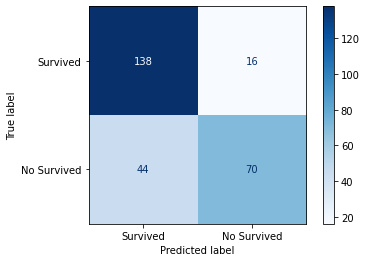

In [55]:
disp = plot_confusion_matrix(kn_clf, X_test_scaled, y_test,
                              display_labels=['Survived','No Survived'],
                              cmap=plt.cm.Blues)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       154
           1       0.81      0.61      0.70       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



### Bilid a SVM Classifier

In [57]:
from sklearn.svm import SVC
svm_clf = SVC()

In [58]:
parameters = { 'C': [0.5,1, 2.5, 50],  
   'gamma': [6, 0.6, 0.06, 0.006, 0.0006], 
   'kernel': ['rbf','linear']}
  
grid_search = GridSearchCV(estimator = svm_clf,        
                           param_grid = parameters,       
                           scoring = 'accuracy',         
                           cv = 10,                       
                           n_jobs = -1,
                          verbose=3,
                          refit = True)                  
 
    
grid_search = grid_search.fit(X_train_scaled, y_train)

print("best accuracy is :" , grid_search.best_score_ * 100)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 4/10] END .......C=0.5, gamma=6, kernel=rbf;, score=0.661 total time=   0.0s
[CV 8/10] END .......C=0.5, gamma=6, kernel=rbf;, score=0.742 total time=   0.0s
[CV 5/10] END ....C=0.5, gamma=6, kernel=linear;, score=0.758 total time=   0.0s
[CV 6/10] END ....C=0.5, gamma=6, kernel=linear;, score=0.726 total time=   0.0s
[CV 9/10] END ....C=0.5, gamma=6, kernel=linear;, score=0.710 total time=   0.0s
[CV 10/10] END ...C=0.5, gamma=6, kernel=linear;, score=0.790 total time=   0.0s
[CV 9/10] END .....C=0.5, gamma=0.6, kernel=rbf;, score=0.742 total time=   0.0s
[CV 10/10] END ....C=0.5, gamma=0.6, kernel=rbf;, score=0.839 total time=   0.0s
[CV 1/10] END ..C=0.5, gamma=0.6, kernel=linear;, score=0.905 total time=   0.0s
[CV 2/10] END ..C=0.5, gamma=0.6, kernel=linear;, score=0.810 total time=   0.0s
[CV 3/10] END .C=0.5, gamma=0.06, kernel=linear;, score=0.762 total time=   0.0s
[CV 4/10] END .C=0.5, gamma=0.06, kernel=linea

In [59]:
svm_clf = SVC(C=2.5,gamma=0.06,kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = svm_clf, X = X_train_scaled, y = y_train, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred = svm_clf.predict(X_test_scaled)
svm_socre = accuracy_score(y_test, y_pred)*100
print('Accuracy score: ', svm_socre)

Validation score: 81.37225% (4.16733%)
Accuracy score:  81.34328358208955


In [60]:
print(confusion_matrix(y_test, y_pred))

[[148   6]
 [ 44  70]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


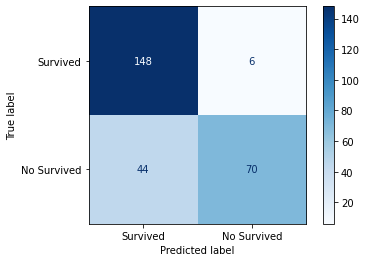

In [61]:
disp = plot_confusion_matrix(svm_clf, X_test_scaled, y_test,
                              display_labels=['Survived','No Survived'],
                              cmap=plt.cm.Blues)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       154
           1       0.92      0.61      0.74       114

    accuracy                           0.81       268
   macro avg       0.85      0.79      0.80       268
weighted avg       0.83      0.81      0.81       268



In [63]:
scores = [dt_score,kn_score,svm_socre]
labels = ['Decision Tree Classifier', 'K-Neighbors Classifier', 'SVM Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Decision Tree Classifier,80.970149
K-Neighbors Classifier,77.611940
SVM Classifier,81.343284


### Model Deployment

In [64]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [65]:
predicted = svm_clf.predict(test_scaled)

In [66]:
predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
fin_submission = pd.DataFrame({
    "PassengerId": gender_submission["PassengerId"],
    "Survived" : predicted
})


In [68]:
fin_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
submiision_csv = fin_submission.to_csv('/kaggle/working/sub.csv',index=False)